### Data analysis

This is a document for analysis the stupid model solution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [2]:
def readResult(filepath):
    new_columns = {
        '[run number]': 'run_number',
        'cool-down': 'cool_down',
        'max-accel': 'max_accel',
        'traffic-flow-from-west': 'traffic_flow_from_west',
        'bonus-delay': 'bonus_delay',
        'initial-tips': 'initial_tips',
        'time-window': 'time_window',
        'wait-cost': 'wait_cost',
        'traffic-flow-from-south': 'traffic_flow_from_south',
        'traffic-flow-from-north': 'traffic_flow_from_north',
        'signal-NS?': 'signal_NS',
        'speed-limit': 'speed_limit',
        'max-brake': 'max_brake',
        'traffic-flow-from-east': 'traffic_flow_from_east',
        '[step]': 'step',
        'reward': 'reward',
        'avg_reward': 'avg_reward',
        'pass-car': 'pass_car',
        'average-speed': 'average_speed',
        'average-wait': 'average_wait',
        'average-drive': 'average_drive'
        }
    columns_to_drop = ['cool_down', 'max_accel', 'traffic_flow_from_west', 
                   'initial_tips', 'time_window', 'wait_cost', 'traffic_flow_from_south',
                   'traffic_flow_from_north', 'signal_NS', 'speed_limit', 'max_brake',
                   'traffic_flow_from_east']
    
    csv = pd.read_csv(filepath)
    csv.rename(columns=new_columns, inplace=True)
    csv.drop(columns=columns_to_drop, inplace=True)
    return csv

In [3]:
def getPlot(list):
    x = range(len(list))
    y = list

    coefficients = np.polyfit(x, y, deg=4)
    trendline = np.polyval(coefficients, x)

    plt.scatter(x, y, s=0.7)
    plt.plot(x, trendline, color='red', label='Trendline')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Scatter Plot with Trendline')
    plt.legend()
    plt.show()

In [4]:
def getRollingAvg(y, window_size):
    x = range(len(y))
    rolling_mean = pd.Series(y).rolling(window=window_size, center=True).mean()

    # Plotting line graphs
    plt.scatter(x, y, s=0.7)
    # plt.plot(x, y, label='Original Data')
    plt.plot(x, rolling_mean,color='red', label=f'Moving Average (Window Size = {window_size})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Moving Average')
    plt.legend()
    plt.show()


In [5]:
def getRollingDev(y, window_size):
    x = range(len(y))
    rolling_var = pd.Series(y).rolling(window=window_size, center=True).apply(lambda x: np.std(x))
    
    # Plotting line graphs
    plt.scatter(x, y, s=0.7)
    # plt.plot(x, y, label='Original Data')
    plt.plot(x, rolling_var,color='red', label=f'Moving Standard Deviation (Window Size = {window_size})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Moving Deviation')
    plt.legend()
    plt.show()


In [6]:
def getRollingDev1(y, window_size, ymin, ymax):
    x = range(len(y))
    rolling_std = pd.Series(y).rolling(window=window_size, center=True).apply(lambda x: np.std(x))

    # Plotting line graphs
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    ax1.scatter(x, y, s=0.7)
    ax2.plot(x, rolling_std, color='red', label=f'Moving Standard Deviation (Window Size = {window_size})')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax2.set_ylabel('Moving Deviation')
    ax1.set_title('Moving Deviation')
    
    # Setting the range of the second vertical axis
    ax2.set_ylim(ymin, ymax)

    # Combined legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='best')

    plt.show()

### Dumb solution

pass_car mean: 120.19333333333333   
average_wait mean: 4.2517575918366655   
average_drive mean: 4.381012889460001   
average_speed mean: 2.900626862136667   

#### Environment:

time-window: 180   
cool-down: 15 (30, 45, 60)   

traffic-flow: NS 10%  EW 25%   

cars: speed-limit 5 max-brake 3 max-accel 3   

random-swith? Y or N    
switch-probability 25 (50 75)   

In [8]:
csv = pd.read_csv("./model/experiment_stupid_signal-table.csv")
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   [run number]             2400 non-null   int64  
 1   max-accel                2400 non-null   int64  
 2   initial-tips             2400 non-null   int64  
 3   waiting-cost             2400 non-null   int64  
 4   traffic-flow-from-south  2400 non-null   int64  
 5   switch-probability       2400 non-null   int64  
 6   signal-NS?               2400 non-null   bool   
 7   speed-limit              2400 non-null   int64  
 8   traffic-flow-from-east   2400 non-null   int64  
 9   cool-down                2400 non-null   int64  
 10  traffic-flow-from-west   2400 non-null   int64  
 11  time-window              2400 non-null   int64  
 12  random-switch?           2400 non-null   bool   
 13  traffic-flow-from-north  2400 non-null   int64  
 14  max-brake               

In [25]:
csv_sub = csv.drop(['[run number]', 'max-accel', 'initial-tips', 'waiting-cost', 'traffic-flow-from-south', 'traffic-flow-from-east', 'traffic-flow-from-west', 'traffic-flow-from-north', 
                     'max-brake', '[step]', 'time-window', 'speed-limit', 'signal-NS?', ], axis=1)
csv_sub.rename(columns=lambda x: x.replace("-", "_"), inplace=True)
csv_sub.rename(columns=lambda x: x.replace("?", ""), inplace=True)
csv_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   switch_probability  2400 non-null   int64  
 1   cool_down           2400 non-null   int64  
 2   random_switch       2400 non-null   bool   
 3   average_speed       2400 non-null   float64
 4   average_wait        2400 non-null   float64
 5   average_drive       2400 non-null   float64
 6   pass_car            2400 non-null   int64  
dtypes: bool(1), float64(3), int64(3)
memory usage: 115.0 KB


In [26]:
csv_cd15 = csv_sub.query("cool_down==15 & random_switch==False")
csv_cd15.head()

,switch_probability,cool_down,random_switch,average_speed,average_wait,average_drive,pass_car
100,25,15,False,3.176605,3.463636,4.200000,110
101,25,15,False,2.745683,4.866071,4.437500,112
102,25,15,False,2.485549,5.230769,4.721154,104
103,25,15,False,2.998799,3.631148,4.467213,122
104,25,15,False,2.640373,4.968000,4.616000,125


In [31]:
average_speed_mean = csv_cd15['average_speed'].mean()
average_wait_mean = csv_cd15['average_wait'].mean()
average_drive_mean = csv_cd15['average_drive'].mean()
pass_car_mean = csv_cd15['pass_car'].mean()


print("pass_car mean:", pass_car_mean)
print("average_wait mean:", average_wait_mean)
print("average_drive mean:", average_drive_mean)
print("average_speed mean:", average_speed_mean)

pass_car mean: 120.19333333333333
average_wait mean: 4.2517575918366655
average_drive mean: 4.381012889460001
average_speed mean: 2.900626862136667


### QLearning solution

#### Env

environment:   
time-window: 180   
cool-down: 15   

traffic flow: NS 10% EW 25%   

cars: speed-limit 5 max-brake 3 max-accel 3   

bonus-delay 3

**Result**

|name|value|
|--|--|
|pass-car|132|     
|average-wait|5.303030303030303|     
|average-drive|4.363636363636363|     
|average-speed|2.8787667034933926|     

#### General review 

In [10]:
csv_ql = pd.read_csv("./model/model_v3 Ave Reward Per Episode.csv")
csv_ql.head()

,y
0,1.051438
1,0.354074
2,1.226588
3,0.638977
4,0.475955


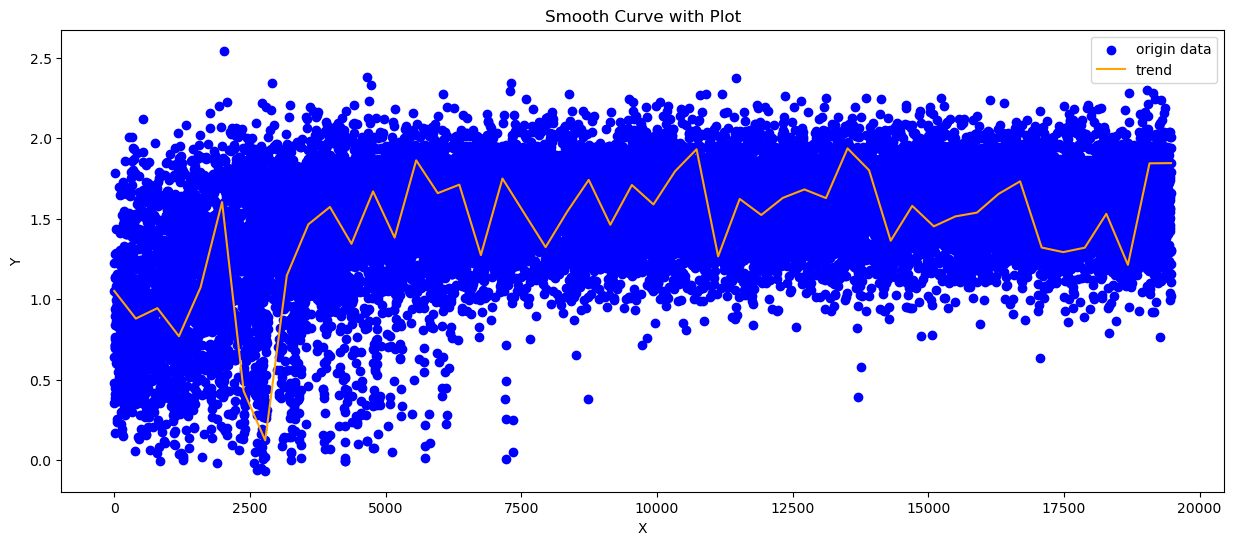

In [23]:
y_data = csv_ql['y']

x_data = range(len(y_data))
x_new = np.linspace(min(x_data), max(x_data), 50)

spl = make_interp_spline(x_data, y_data)
y_smooth = spl(x_new)


plt.figure(figsize=(15, 6))

plt.scatter(x_data, y_data, color='blue', label='origin data')
plt.plot(x_new, y_smooth, color='orange', label='trend')
#plt.fill_between(x_new, y_smooth, y_data.max(), color='orange', alpha=0.3)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Smooth Curve with Plot')
plt.legend()
plt.show()

#### Q table sample


[1.0, 0.0, 7.0, 0.0] -> -19.06206560420644 / -16.496870056253155   
[0.0, 3.0, 0.0, 2.0] -> -12.619549672487661 / -33.61444574717617   
[5.0, 0.0, 4.0, 0.0] -> -38.65093838879212 / -17.19508267414104   
[0.0, 3.0, 0.0, 4.0] -> -27.962340512017846 / -45.48962393049666   
[0.0, 3.0, 0.0, 0.0] -> -2.2321796150464053 / -20.199679304398913   
[0.0, 3.0, 0.0, 8.0] -> -99.84753616947685 / -73.7917037245436   
[0.0, 8.0, 0.0, 0.0] -> -27.461699999999997 / -14.824444444444442   
[8.0, 0.0, 4.0, 0.0] -> -63.81606235090793 / -60.51257010238837   
[0.0, 1.0, 0.0, 3.0] -> -7.082286068907393 / -33.76942729012743   
[0.0, 1.0, 1.0, 2.0] -> 0.9177777777777779 / 0.0   
[5.0, 0.0, 9.0, 0.0] -> -20.882404293333334 / -18.721791666666668   
[3.0, 0.0, 5.0, 0.0] -> -28.48628947624758 / -15.886028687758074   
[7.0, 0.0, 2.0, 0.0] -> -28.46876289131643 / -26.52437684656865   
[2.0, 0.0, 3.0, 0.0] -> -23.09135832507939 / -21.80553092977882   
[0.0, 0.0, 0.0, 7.0] -> -14.9967335 / -17.67510888888889   
[6.0, 0.0, 0.0, 0.0] -> -7.698424773400194 / -8.323185836   
[0.0, 8.0, 0.0, 6.0] -> -129.20158081192963 / -136.5098288879756   
[1.0, 0.0, 1.0, 0.0] -> -2.601149634640937 / -10.000869767690666   
[0.0, 8.0, 0.0, 2.0] -> -56.44981129064721 / -59.956207199569505   
[0.0, 8.0, 0.0, 8.0] -> -157.14446337708102 / -249.6502936829875   
[0.0, 1.0, 0.0, 1.0] -> -3.3700683678022267 / -17.94532068190407   
[9.0, 0.0, 6.0, 0.0] -> -23.059407320261435 / -30.229965850000003   
[4.0, 0.0, 7.0, 0.0] -> -42.999587360635005 / -31.972086569411054   
[0.0, 8.0, 0.0, 4.0] -> -121.01525222104928 / -102.39840155537576   
[7.0, 0.0, 5.0, 0.0] -> -48.38590551747796 / -42.943167453380646   
[9.0, 0.0, 9.0, 0.0] -> -55.20802736842106 / -72.80097918128655   
[0.0, 5.0, 0.0, 7.0] -> -86.08245373798223 / -73.43450052442468   
[0.0, 5.0, 0.0, 5.0] -> -54.4241710109633 / -42.57360528514572   

#### Analysis

##### Part 1

###### BD1

In [12]:
csv_ql_bd_1 = readResult('./model/model_v3_bd_1.csv')
csv_ql_bd_1.info()
csv_ql_bd_1.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800001 entries, 0 to 1800000
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   run_number     int64  
 1   bonus_delay    int64  
 2   step           int64  
 3   reward         float64
 4   avg_reward     float64
 5   pass_car       int64  
 6   average_speed  float64
 7   average_wait   float64
 8   average_drive  float64
dtypes: float64(5), int64(4)
memory usage: 123.6 MB


,run_number,bonus_delay,step,reward,avg_reward,pass_car,average_speed,average_wait,average_drive
0,1,1,0,0.0,0.0,0,0.0,0.0,0.0
1,1,1,1,0.0,0.0,0,0.0,0.0,0.0
2,1,1,2,0.0,0.0,0,0.0,0.0,0.0
3,1,1,3,0.0,0.0,0,0.0,0.0,0.0
4,1,1,4,0.0,0.0,0,0.0,0.0,0.0


In [39]:
csv_ql_bd_1_unique_avg_reward = csv_ql_bd_1['avg_reward'].unique()
csv_ql_bd_1_unique_avg_reward_sorted = sorted(csv_ql_bd_1_unique_avg_reward, key=lambda x: csv_ql_bd_1.loc[csv_ql_bd_1['avg_reward'] == x, 'step'].min())
csv_ql_bd_1_unique_avg_reward_sorted

[0.0,
 0.0338931421854611,
 0.1826388958083208,
 0.2984248755408623,
 0.0213830874771553,
 0.1066522080326541,
 0.1816641452652435,
 0.1587824232696699,
 0.1595638978238554,
 0.0675911685697006,
 0.0816564103623019,
 0.2605331425668831,
 0.3094214421905211,
 0.2209334068338079,
 0.2803140822534361,
 0.0375815010802773,
 0.1459315064020946,
 0.1027578744650322,
 0.2900541500843057,
 0.342737091693071,
 0.3264614385281619,
 0.211910939532457,
 0.2526883958906017,
 0.0496912816943016,
 0.2967285478559401,
 0.1784381000703923,
 0.2154100436827152,
 0.1714458127754253,
 0.2840111059113817,
 0.34235606917924,
 0.2526572244311655,
 0.3595580912182759,
 0.2276946768872237,
 0.3677150073189674,
 0.251396052119839,
 0.0356464397353144,
 0.3277235651615705,
 0.0865250540507576,
 0.2041342473628569,
 0.3152148492242709,
 0.047369801931734,
 0.1233735054943694,
 0.2077193328804291,
 0.2922318310470533,
 0.2607004492119107,
 0.3247408601400824,
 0.234606722939895,
 0.2467813078090629,
 0.35669619277

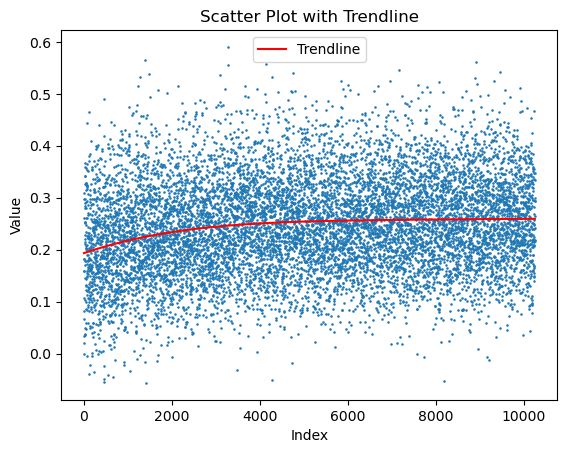

In [67]:
getPlot(csv_ql_bd_1_unique_avg_reward_sorted)

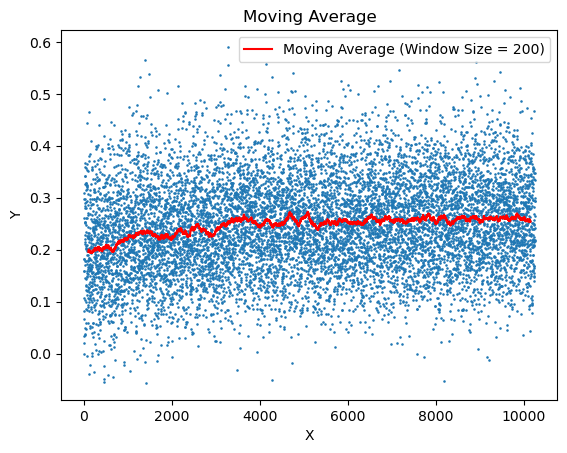

In [100]:
getRollingAvg(csv_ql_bd_1_unique_avg_reward_sorted,200)

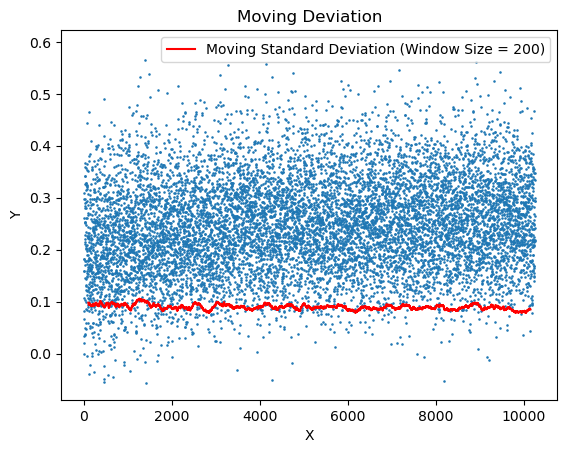

In [99]:
getRollingDev(csv_ql_bd_1_unique_avg_reward_sorted,200)

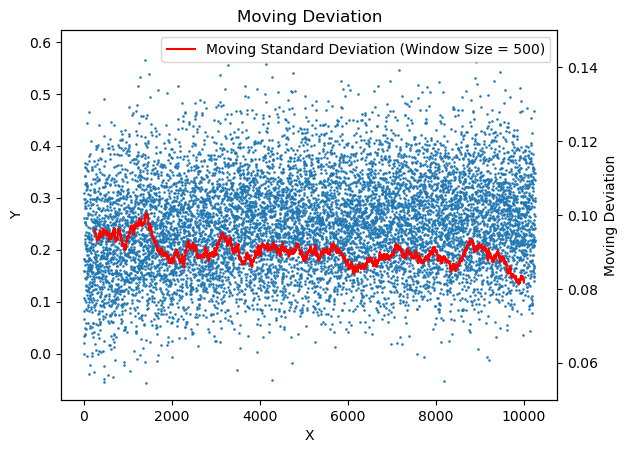

In [137]:
getRollingDev1(csv_ql_bd_1_unique_avg_reward_sorted,500, 0.05, 0.15)

###### BD2

In [110]:
csv_ql_bd_2 = readResult('./model/model_v3_bd_2.csv')

In [123]:
csv_ql_bd_2_unique_avg_reward = csv_ql_bd_2['avg_reward'].unique()
csv_ql_bd_2_unique_avg_reward_sorted = sorted(csv_ql_bd_2_unique_avg_reward, key=lambda x: csv_ql_bd_2.loc[csv_ql_bd_2['avg_reward'] == x, 'step'].min())

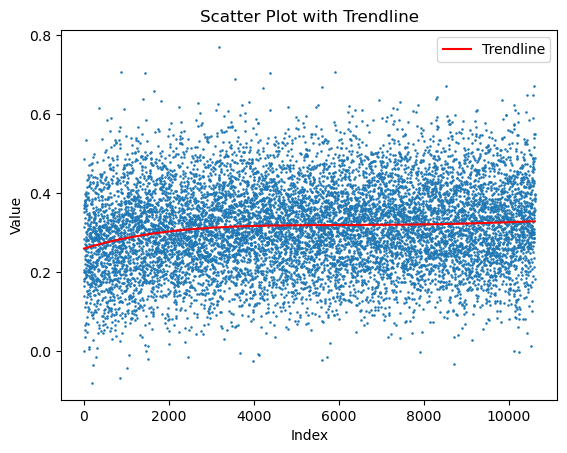

In [124]:
getPlot(csv_ql_bd_2_unique_avg_reward_sorted)

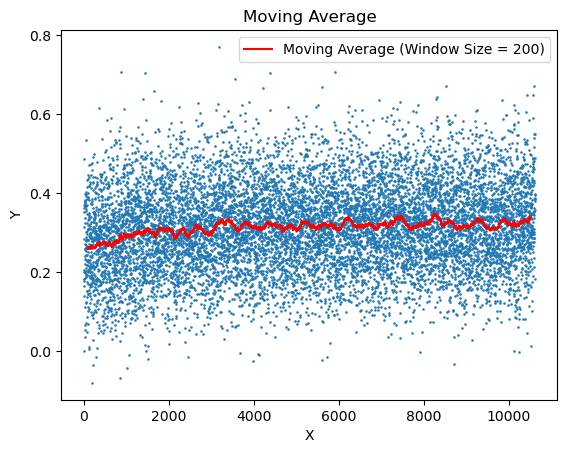

In [125]:
getRollingAvg(csv_ql_bd_2_unique_avg_reward_sorted,200)

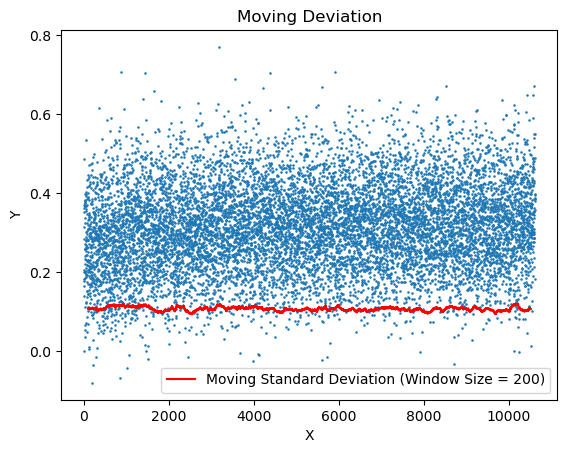

In [126]:
getRollingDev(csv_ql_bd_2_unique_avg_reward_sorted,200)

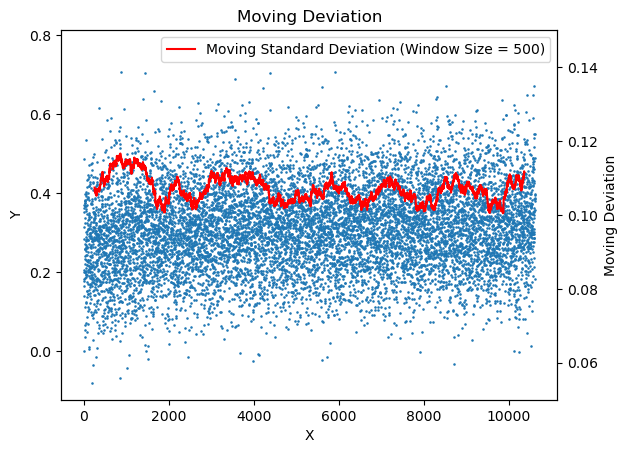

In [136]:
getRollingDev1(csv_ql_bd_2_unique_avg_reward_sorted,500, 0.05, 0.15)

###### BD3

In [128]:
csv_ql_bd_3 = readResult('./model/model_v3_bd_3.csv')

In [122]:
csv_ql_bd_3_unique_avg_reward = csv_ql_bd_3['avg_reward'].unique()
csv_ql_bd_3_unique_avg_reward_sorted = sorted(csv_ql_bd_3_unique_avg_reward, key=lambda x: csv_ql_bd_3.loc[csv_ql_bd_3['avg_reward'] == x, 'step'].min())


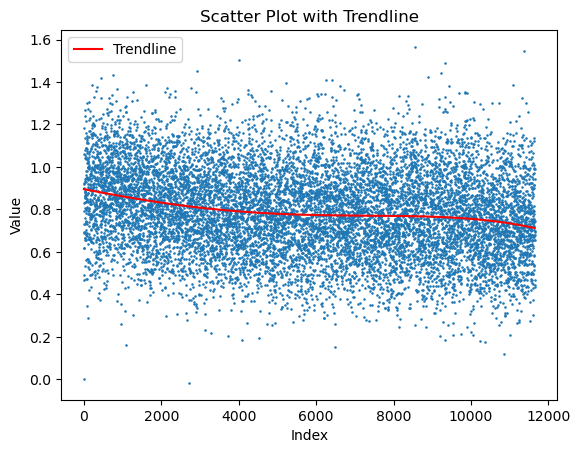

In [129]:
getPlot(csv_ql_bd_3_unique_avg_reward_sorted)

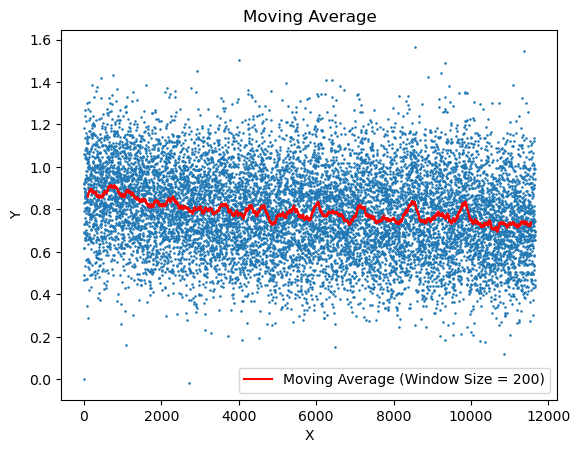

In [130]:
getRollingAvg(csv_ql_bd_3_unique_avg_reward_sorted,200)

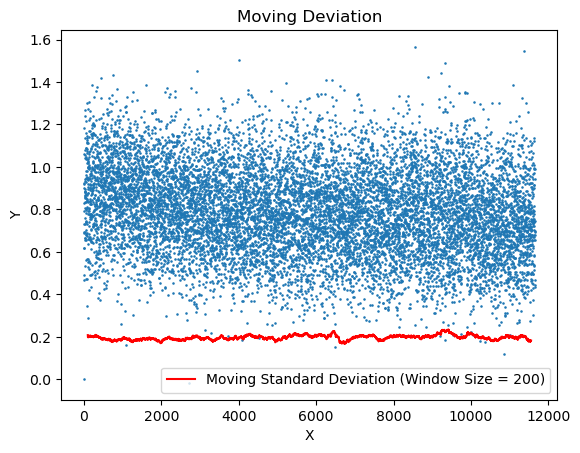

In [131]:
getRollingDev(csv_ql_bd_3_unique_avg_reward_sorted,200)

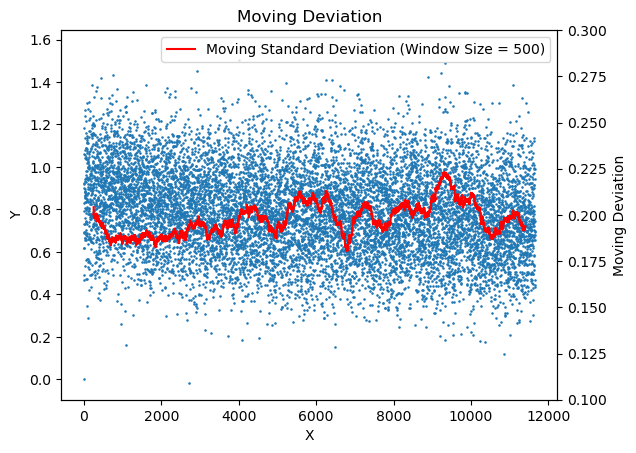

In [135]:
getRollingDev1(csv_ql_bd_3_unique_avg_reward_sorted,500, 0.1, 0.3)